# Extração de Dados

 Os dados foram coletados da API do Yahoo Finance, através do Pandas Data Reader.

In [1]:
import pandas as pd
from pandas_datareader import data as pdr

Agora, basta preenchê-lo, com as informações (no caso, MSFT — Microsoft) e a data de início da série (no caso, 12/05/2020) e a função nos retornará um dataframe!

In [2]:
df = pdr.DataReader('MSFT', data_source='yahoo', start='2020-05-12')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-12,187.039993,182.300003,186.800003,182.509995,32038200.0,180.673965
2020-05-13,184.050003,176.539993,182.550003,179.750000,44711500.0,177.941742
2020-05-14,180.690002,175.679993,177.539993,180.529999,41873900.0,178.713898
2020-05-15,187.059998,177.000000,179.059998,183.160004,46610400.0,181.317429
2020-05-18,186.199997,183.960007,185.750000,184.910004,35264500.0,183.049850


Com o df em mãos, é necessário entender as features obtidas:
* Open — preço de abertura do ativo no dia de negociação
* High — preço mais alto do ativo no dia de negociação
* Low — preço mais baixo do ativo no dia de negociação
* Close — preço de fechamento do ativo no dia de negociação
* Volume — Volume de negociação do ativo em USD
* Adjusted Close — preço de fechamento ajustado (eventuais pagamentos de dividendos e outros)

## Retorno de um ativo
A melhor parte do investimento
### Retorno Simples
Agora que já temos os dados do nosso ativo, vamos realizar algumas análises. Começando pelo principal fator que motiva a realização de um investimento: o retorno. Para calculá-lo, normalmente, deve-se considerar os dividendos pagos pela empresa ao longo do período analisado. Contudo, não possuímos essa informação em nosso dataset. Portanto, nesse primeiro momento, consideraremos apenas o retorno advindo do aumento (ou queda) do preço da ação. Em linhas gerais, calculamos o retorno utilizando a seguinte fórmula:

$$\begin{equation}
R = \frac{P_t-P_{ti}}{P_{ti}} 
\end{equation}$$

Sendo:
* $R$: retorno da ação;
* $P_t$: preço da ação no dia em que foi vendida (preço final);
* $P_{ti}$: preço da ação no dia em que foi comprada (preço inicial).

Essa fórmula trata do chamado retorno simples — ou aritmético — da ação. Esse pode ser facilmente calculado usando uma função do pandas.

In [15]:
df['simp_return'] = df['Close'].pct_change()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,simp_return,log_return,log_ret_cum,simp_ret_cum
Date,,,,,,,,,,
2021-05-06,249.860001,244.690002,246.449997,249.729996,26491100.0,249.729996,0.013227,0.013140,0.313575,0.368309
2021-05-07,254.300003,251.169998,252.149994,252.460007,27010100.0,252.460007,0.010932,0.010873,0.324448,0.383267
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993,-0.020914,-0.021136,0.303312,0.354337
2021-05-11,246.600006,242.570007,244.550003,246.229996,33628300.0,246.229996,-0.003843,-0.003851,0.299461,0.349132
2021-05-12,244.369995,238.070007,242.164993,239.000000,34616697.0,239.000000,-0.029363,-0.029802,0.269659,0.309517


Com apenas duas linhas de código, adicionamos uma coluna com o retorno simples do ativo calculado para cada dia do período em questão. Mas, esse retorno dia a dia não nos diz muito sobre o ganho do investidor ao final do período. Para isso, podemos utilizar o retorno cumulativo simples, que é dado pela fórmula:
$$\begin{equation}
R_{cum} = (1+R_{t_1})\cdot(1+R_{t_2})\cdot...\cdot(1+R_{t_n})
\end{equation}$$

Sendo:
* $R_{cum}$: retorno simples cumulativo;
* $R_{t1}$: retorno simples do primeiro dia de investimento;
* $R_{t2}$: retorno simples do segundo dia de investimento;
* $R_n$: retorno simples do último dia.

Talvez seja contra-intuitivo tratar-se de uma multiplicação ao invés de um somatório. Mas, considerando que cada retorno é percentual, essa lógica mostra-se coerente. Por exemplo, se você comprou uma ação e ela valorizou 5% em um dia e, no dia seguinte, ela desvalorizou 2%, quanto ela valorizou (ou desvalorizou) ao todo considerando esse período? 3%? Não, pois repare que ela desvalorizou 2% considerando a valorização de 5% do dia anterior. Ou seja, ela diminuiu 2% do 105% do valor original. Portanto, ela valorizou 2,9%.

In [16]:
df['simp_ret_cum'] = (df['simp_return'] + 1).cumprod()-1
df.tail()

,High,Low,Open,Close,Volume,Adj Close,simp_return,log_return,log_ret_cum,simp_ret_cum
Date,,,,,,,,,,
2021-05-06,249.860001,244.690002,246.449997,249.729996,26491100.0,249.729996,0.013227,0.013140,0.313575,0.368309
2021-05-07,254.300003,251.169998,252.149994,252.460007,27010100.0,252.460007,0.010932,0.010873,0.324448,0.383267
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993,-0.020914,-0.021136,0.303312,0.354337
2021-05-11,246.600006,242.570007,244.550003,246.229996,33628300.0,246.229996,-0.003843,-0.003851,0.299461,0.349132
2021-05-12,244.369995,238.070007,242.164993,239.000000,34616697.0,239.000000,-0.029363,-0.029802,0.269659,0.309517


Nesse caso, percebemos que a ação da Microsoft deu um retorno cumulativo de 31,51% no período de um ano. E se calculássemos pela primeira forma mostrada, considerando apenas o preço de compra e venda?
$$\begin{equation}
R = \frac{244,36-187,03}{187,03} = 0,3065
\end{equation}$$
Como podemos perceber (e prever), obtivemos valores próximos, mostrando que as duas formas para o cálculo do retorno simples em um dado período são eficazes.

In [12]:
(df['High']['2021-05-12']-df['High']['2020-05-12'])/df['High']['2020-05-12']

0.3065119968399034

### Retorno Logarítmico
 Também podemos calcular o retorno logarítmico.
 $$\begin{equation}
R_{log} = \ln{\left (\dfrac{P_t}{P_{ti}}\right )}
\end{equation}$$

* $R_{log}$: retorno logarítmico da ação;
* $P_t$: preço da ação no dia em que foi vendida (preço final);
* $P_{ti}$: preço da ação no dia em que foi comprada (preço inicial).

In [17]:
from numpy import log
df['log_return'] = log(df['Close']/df['Close'].shift(1))
df.head(5)

,High,Low,Open,Close,Volume,Adj Close,simp_return,log_return,log_ret_cum,simp_ret_cum
Date,,,,,,,,,,
2020-05-12,187.039993,182.300003,186.800003,182.509995,32038200.0,180.673965,NaN,NaN,NaN,NaN
2020-05-13,184.050003,176.539993,182.550003,179.750000,44711500.0,177.941742,-0.015122,-0.015238,-0.015238,-0.015122
2020-05-14,180.690002,175.679993,177.539993,180.529999,41873900.0,178.713898,0.004339,0.004330,-0.010908,-0.010849
2020-05-15,187.059998,177.000000,179.059998,183.160004,46610400.0,181.317429,0.014568,0.014463,0.003555,0.003561
2020-05-18,186.199997,183.960007,185.750000,184.910004,35264500.0,183.049850,0.009554,0.009509,0.013064,0.013150


 Mais uma vez, nos deparamos com o mesmo problema: os retornos diários não dizem muita coisa sobre o ganho do investidor ao final do período. Para tal, utilizaremos novamente o retorno cumulativo. Neste caso, o retorno cumulativo logarítmico apresenta a seguinte fórmula:
 
$$\begin{equation}
R_{cum} = (R_{t_1})\cdot(R_{t_2})\cdot...\cdot(R_{t_n})
\end{equation}$$

Sendo:
* $R_{cum}$: retorno logarítmico cumulativo;
* $R_{t_1}$: retorno logarítmico do primeiro dia de investimento;
* $R_{t_2}$: retorno logarítmico do segundo dia de investimento;
* $R_{t_n}$: retorno logarítmico do último dia de investimento.

Bem mais simples do que a fórmula do retorno simples cumulativo. Essa é justamente uma das razões pelas quais, em certas situações, é preferível utilizarmos o retorno logarítmico ao invés do simples. 

In [19]:
df['log_ret_cum'] = df['log_return'].cumsum()
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,simp_return,log_return,log_ret_cum,simp_ret_cum
Date,,,,,,,,,,
2021-05-06,249.860001,244.690002,246.449997,249.729996,26491100.0,249.729996,0.013227,0.013140,0.313575,0.368309
2021-05-07,254.300003,251.169998,252.149994,252.460007,27010100.0,252.460007,0.010932,0.010873,0.324448,0.383267
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993,-0.020914,-0.021136,0.303312,0.354337
2021-05-11,246.600006,242.570007,244.550003,246.229996,33628300.0,246.229996,-0.003843,-0.003851,0.299461,0.349132
2021-05-12,244.369995,238.070007,242.164993,239.000000,34616697.0,239.000000,-0.029363,-0.029802,0.269659,0.309517


Assim, podemos ver que o investidor teve um retorno logarítmico cumulativo de 26,96%. Analogamente ao feito anteriormente, vamos substituir os valores na fórmula original de retorno logarítmico para atestar a equivalência entre as fórmulas:

$$\begin{equation}
R_{log} = \ln{\left (\dfrac{244,36}{215,58}\right )= 0,2673}
\end{equation}$$

In [6]:
log(df['High']['2021-05-12']/df['High']['2020-05-12'])

0.2673609883626278

Conforme o esperado, obtivemos um valor muito próximo  ao calcularmos o cumulativo. Contudo, este está um tanto quanto discrepante do retorno simples obtido. Agora você pode estar se perguntando: qual a relação entre os dois retornos? Esta é dada pela seguinte fórmula:


$$\begin{equation}
R_{log} = \ln{\left (R_{sim}+1\right )}
\end{equation}$$

Sendo:
* $R_{log}$: retorno logarítmico;
* $R_{sim}$: retorno simples.

Por fim, cabe mencionar que, nos cálculos de retorno apresentados acima, não consideramos o efeito da inflação. Como os preços tendem a subir (ou até descer) com o passar do tempo, o valor do dinheiro (em termos de poder aquisitivo) muda também. Por exemplo, se no período de um ano, houve uma inflação de 5% e uma ação deu um retorno de 14,5%, o retorno real do investimento foi de 9,5%.

## Cálculo de Risco
Risco, o que é e como calcular?
Todos nós temos uma breve noção do que risco significa em nossas vidas: que risco estou passando ao deixar meu carro destrancado a noite em uma rua deserta? Que risco passo ao apostar na mega sena? Qual é o risco de um investimento?

Se enxergamos nossos investimentos como empreendimentos, temos até que uma boa primeira definição para o risco dentro do mercado financeiro. Mas, diferentemente do risco de ser roubado a noite em uma rua escura, o risco do retorno de um ativo pode ser mensurado!

### Desvio padrão
Como podemos metrificar essa volatilidade? Há uma série de maneiras para mensurar o risco, mas, em sua forma mais simples, o risco pode ser calculado pelo desvio padrão.

$$\begin{equation}
s = \sqrt{\frac{\sum{\left(x_i-\bar{x}\right )^2}}{n}}
\end{equation}$$

Sendo:
* $x_i$: retorno do dia
* $\bar{x}$: média dos retornos
* $n$: número de retornos

Basicamente, a partir do $\left(x_i-\bar{x}\right )$, vemos o quanto os retornos estão divergindo da média. Somamos todas essas diferenças e elevamos ao quadrado, para ter um valor positivo. Tiramos a média ao dividir por n e, finalmente, desfazemos o efeito do “elevar ao quadrado” ao tirar a raiz quadrada.

In [20]:
df[['simp_return','log_return','log_ret_cum','simp_ret_cum']].std()

simp_return     0.017487
log_return      0.017523
log_ret_cum     0.088106
simp_ret_cum    0.105936
dtype: float64

### Desvio Padrão a cada período t
Podem ocorrer picos de retorno sazonais negativos ou positivos e isso interfere no cálculo do desvio padrão. Para superar esse problema, podemos calcular o desvio padrão a cada t períodos de tempo, nesse caso, usaremos t = 30 (1 mês).

<AxesSubplot:xlabel='Date'>

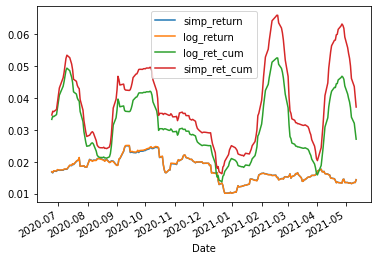

In [21]:
t = 30

df[['simp_return','log_return','log_ret_cum','simp_ret_cum']].rolling(t).std().plot()

Note que agora conseguimos isolar o efeito de períodos mais voláteis e, focar apenas em períodos que queremos estudar.

### Outras medidas de risco
Existem diversas outras medidas de risco que podemos usar, como o Desvio padrão exponencial móvel (EWMA), o desvio padrão estimado pelo High e Low (Parkinson Number) e o desvio padrão estimado por High, Low, Close e Open (Garman-Klass)